## Exercice 1 : décroissance radioactive
Intégrer avec les trois méthodes d'Euler l'équation de la décroissance radioactive. Comparer vos résultats et discuter de la stabilité
$$
\frac{d y}{dt}=-\lambda y, \quad y(t=0)=y_{0}
$$

## Solution :
### Euler avant :
$$y_{i+1}=y_{i}-h\lambda y_i$$
$$\Rightarrow y_{i+1} = (1-h\lambda)y_i$$

### Euler arrière :
$$y_{i+1}=y_{i}-h\lambda y_{i+1}$$
$$\Rightarrow y_{i+1} = \frac{1}{1+h\lambda}y_i$$

### Euler centré :
$$y_{i+1}=x_{i}-\frac{h}{2}\lambda\left(y_i + y_{i+1}\right)$$
$$\Rightarrow y_{i+1} = \frac{1-\frac{h\lambda}{2}}{1+\frac{h\lambda}{2}}$$

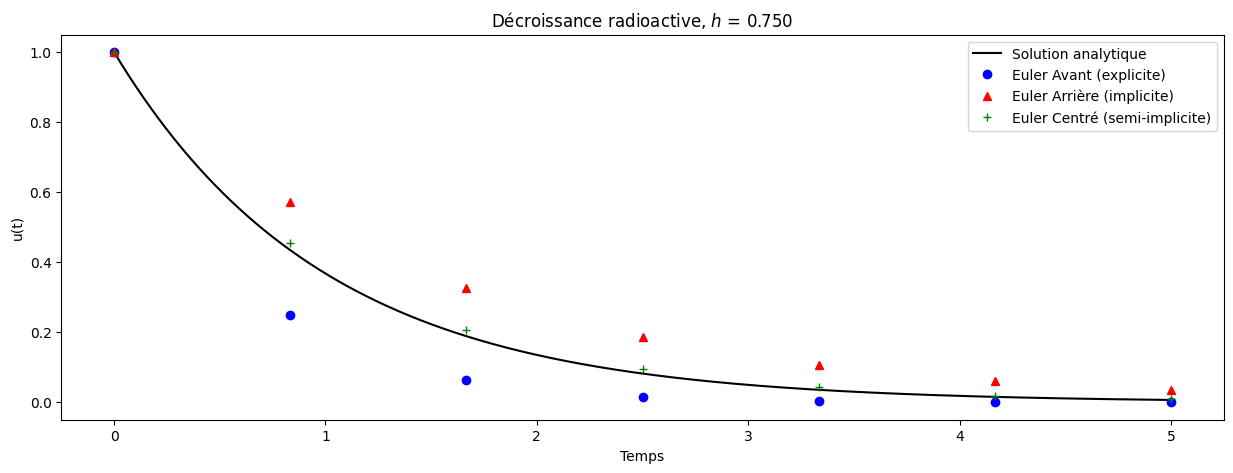

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres physiques (lambda représente le taux de décroissance)
lmb = 1

# Paramètres numériques
t_max = 5  # Temps maximum de simulation
h = 0.75  # Pas de temps
N = int(np.floor(t_max / h)) + 1  # Nombre total de points de temps
t = np.linspace(0, t_max, N)  # Tableau de temps

# Initialisation des tableaux pour les solutions des trois méthodes
u_Euler_avant = np.zeros(N)  # Méthode d'Euler avant (forward)
u_Euler_arriere = np.zeros(N)  # Méthode d'Euler arrière (backward)
u_Euler_centre = np.zeros(N)  # Méthode d'Euler centré (centered)

# Condition initiale (à t=0, u(0) = 1)
u0 = 1

u_Euler_avant[0] = u0
u_Euler_arriere[0] = u0
u_Euler_centre[0] = u0

# Boucle temporelle pour appliquer les différentes méthodes d'intégration
for i in range(N - 1):
    # Méthode d'Euler avant (explicite)
    u_Euler_avant[i+1] = (1 - h * lmb) * u_Euler_avant[i]

    # Méthode d'Euler arrière (implicite)
    u_Euler_arriere[i+1] = u_Euler_arriere[i] / (1 + h * lmb)

    # Méthode d'Euler centrée (semi-implicite)
    u_Euler_centre[i+1] = ((1 - h * lmb / 2) /
                           (1 + h * lmb / 2)) * u_Euler_centre[i]

# Tracé des résultats
fig, ax = plt.subplots(figsize=(15, 5))

# Solution analytique de décroissance exponentielle
# Plus de points pour la courbe analytique
t_continu = np.linspace(0, t_max, 1001)
u_analytique = np.exp(-lmb * t_continu)  # Solution exacte

# Tracé de la solution analytique
ax.plot(t_continu, u_analytique, label='Solution analytique', color='black')

# Tracés des solutions numériques
ax.plot(t, u_Euler_avant, 'o', label='Euler Avant (explicite)', color='blue')
ax.plot(t, u_Euler_arriere, '^', label='Euler Arrière (implicite)', color='red')
ax.plot(t, u_Euler_centre, '+',
        label='Euler Centré (semi-implicite)', color='green')

# Configuration du graphique
ax.legend()
ax.set_title('Décroissance radioactive, $h$ = %.3f' % h)
ax.set_xlabel('Temps')
ax.set_ylabel('u(t)')
plt.show()

## Exercice 2 : équation logistique
Intégrer avec les méthodes d'Euler avant, de Heun et RK4 et comparer les erreurs avec la solution analytique. Les méthodes implicites et semi-implicites sont-elles applicables ?
$$
\frac{d y}{dt}=\lambda y(1-y), \quad y(t=0)=y_{0} \text{ avec } 0<y_0\leq1
$$

Solution analytique :
$$
y(t) = \frac{y_0}{y_0+(1-y_0)e^{-\lambda t}}
$$

## Solution :
### Euler avant :
$$y_{i+1}=y_{i}+h\lambda y_i(1-y_i) $$
$$\Rightarrow y_{i+1} = (1+h\lambda)y_i - h\lambda y_i ^ 2$$

### Heun :
$$\tilde{y}_{i+1} = (1+h\lambda)y_i - h\lambda y_i ^ 2$$
$$\Rightarrow y_{i+1} = y_i + \frac{h\lambda}{2}\left(y_i(1-y_i) + \tilde{y}_{i+1}(1-\tilde{y}_{i+1})\right)$$

### RK4 :
$$ k_1 = h\lambda y_i(1-y_i) $$
$$ k_2 = h\lambda \left(y_i + \frac{k_1}{2}\right)\left(1-y_i - \frac{k_1}{2}\right) $$
$$ k_3 = h\lambda \left(y_i + \frac{k_2}{2}\right)\left(1-y_i - \frac{k_2}{2}\right) $$
$$ k_4 = h\lambda \left(y_i + k_3\right)\left(1-y_i - k_3\right) $$
$$\Rightarrow y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$


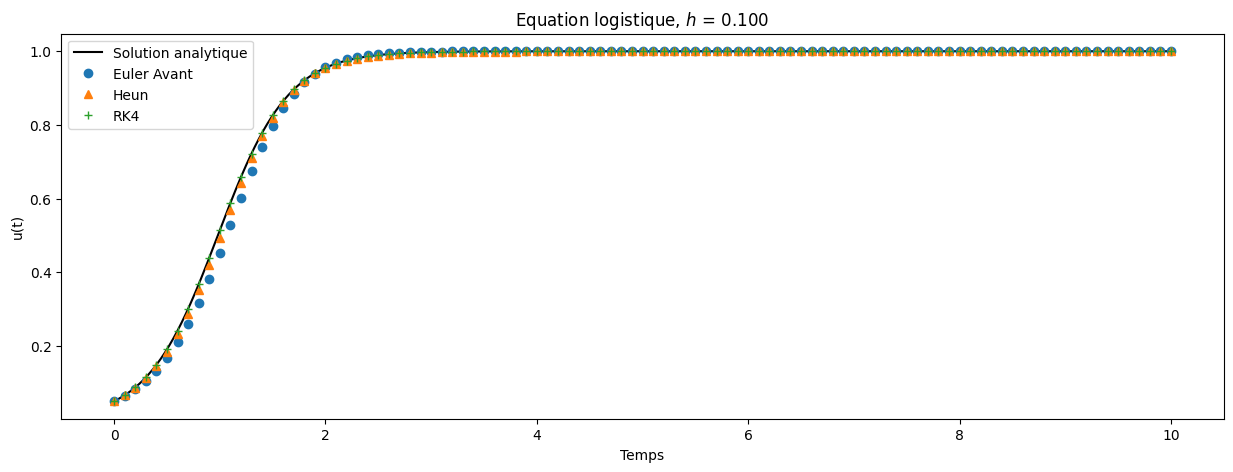

In [4]:
# Paramètres physiques (lambda représente le taux de croissance)
lmb = 3.0

# Paramètres numériques
t_max = 10.0  # Temps maximum de simulation
h = 0.1  # Pas de temps
N = int(np.floor(t_max / h)) + 1  # Nombre total de points de temps
t = np.linspace(0, t_max, N)  # Tableau de temps

# Initialisation des tableaux pour les solutions des trois méthodes
u_Euler_avant = np.zeros(N)  # Méthode d'Euler avant (forward)
u_RK2 = np.zeros(N)  # Méthode d'Heun (RK2)
u_RK4 = np.zeros(N)  # Méthode de Runge-Kutta d'ordre 4 (RK4)

# Condition initiale (à t=0, u(0) = 1)
u0 = 0.05

u_Euler_avant[0] = u0
u_RK2[0] = u0
u_RK4[0] = u0

# Boucle temporelle pour appliquer les différentes méthodes d'intégration
for i in range(N - 1):
    u_Euler_avant[i+1] = (1 + h * lmb) * u_Euler_avant[i] - \
        h * lmb * u_Euler_avant[i]**2

    u_RK2[i+1] = u_RK2[i] + (h * lmb)/2 * (u_RK2[i] * (1 - u_RK2[i]) +
                                           u_Euler_avant[i+1] * (1 - u_Euler_avant[i+1]))
    k1 = h * lmb * u_RK4[i] * (1 - u_RK4[i])
    k2 = h * lmb * (u_RK4[i] + k1/2) * (1 - u_RK4[i] - k1/2)
    k3 = h * lmb * (u_RK4[i] + k2/2) * (1 - u_RK4[i] - k2/2)
    k4 = h * lmb * (u_RK4[i] + k3) * (1 - u_RK4[i] - k3)
    u_RK4[i+1] = u_RK4[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

# Tracé des résultats
fig, ax = plt.subplots(figsize=(15, 5))

# Solution analytique de l'équation logistique
# Plus de points pour la courbe analytique
t_continu = np.linspace(0, t_max, 1001)
u_analytique = u0 / (u0 + (1-u0)*np.exp(-lmb*t_continu))  # Solution exacte

# Tracé de la solution analytique
ax.plot(t_continu, u_analytique, label='Solution analytique', color='black')

# Tracés des solutions numériques
ax.plot(t, u_Euler_avant, 'o', label='Euler Avant')
ax.plot(t, u_RK2, '^', label='Heun')
ax.plot(t, u_RK4, '+', label='RK4')

# Configuration du graphique
ax.legend()
ax.set_title('Equation logistique, $h$ = %.3f' % h)
ax.set_xlabel('Temps')
ax.set_ylabel('u(t)')
plt.show()

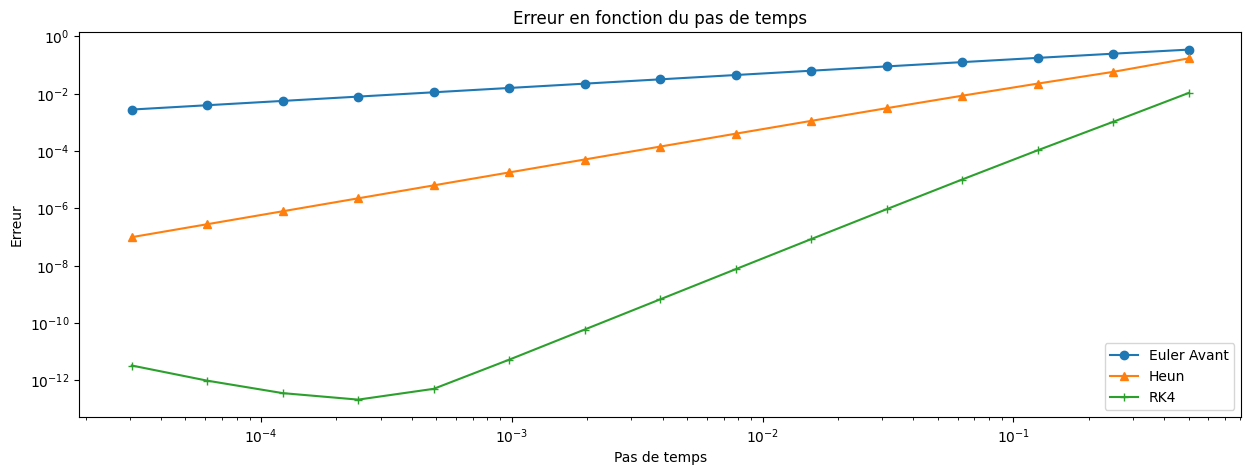

In [3]:
## Pour les méthodes explicites, on peut directement définir une routine de calcul de la solution
## qui prend en argument la fonction f(u,t), u0, le pas de temps h et le temps maximum t_max

def solve_euler_explicit(f, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    u = np.zeros(N)
    u[0] = u0
    for i in range(N - 1):
        u[i+1] = u[i] + h * f(u[i], t[i])
    return t, u

def solve_RK2(f, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    u = np.zeros(N)
    u[0] = u0
    for i in range(N - 1):
        utilde = u[i] + h * f(u[i], t[i])
        u[i+1] = u[i] + h/2 * (f(u[i], t[i]) + f(utilde, t[i] + h))
    return t, u

def solve_RK4(f, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    u = np.zeros(N)
    u[0] = u0
    for i in range(N - 1):
        k1 = h * f(u[i], t[i])
        k2 = h * f(u[i] + k1/2, t[i] + h/2)
        k3 = h * f(u[i] + k2/2, t[i] + h/2)
        k4 = h * f(u[i] + k3, t[i] + h)
        u[i+1] = u[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, u

## On peut alors facilement tracer un graphique de l'erreur en fonction du pas de temps
f = lambda u, t: lmb * u * (1 - u) # Equation logistique
F = lambda t: u0 / (u0 + (1-u0)*np.exp(-lmb*t)) # Solution exacte

t_max = 10.0
u0 = 0.05

h_values = 2.0**np.arange(-15, 0, 1)

erreur_Euler_avant = np.zeros(len(h_values))
erreur_RK2 = np.zeros(len(h_values))
erreur_RK4 = np.zeros(len(h_values))

for i, h in enumerate(h_values):
    t, u_Euler_avant = solve_euler_explicit(f, u0, h, t_max)
    t, u_RK2 = solve_RK2(f, u0, h, t_max)
    t, u_RK4 = solve_RK4(f, u0, h, t_max)
    F_values = F(t)
    erreur_Euler_avant[i] = np.linalg.norm(u_Euler_avant - F_values, 2)
    erreur_RK2[i] = np.linalg.norm(u_RK2 - F_values, 2)
    erreur_RK4[i] = np.linalg.norm(u_RK4 - F_values, 2)

fig, ax = plt.subplots(figsize=(15, 5))

ax.loglog(h_values, erreur_Euler_avant, 'o-', label='Euler Avant')
ax.loglog(h_values, erreur_RK2, '^-', label='Heun')
ax.loglog(h_values, erreur_RK4, '+-', label='RK4')

ax.legend()
ax.set_title('Erreur en fonction du pas de temps')
ax.set_xlabel('Pas de temps')
ax.set_ylabel('Erreur')
plt.show()
    